In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize as opt
from scipy.optimize import Bounds
import urllib
from sqlalchemy import create_engine
import json
import csv

In [8]:
def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)

    # show graph
    plt.show()

In [9]:
def func_graph(n, p):
    vector_c = []
    graph = nx.gnp_random_graph(n, p)
    A = nx.to_numpy_array(graph, dtype='int32')
    A = A+np.eye(n,dtype='int32')
#     nx.draw(graph, pos=nx.spring_layout(graph), node_color='g', with_labels=True)
#     plt.draw()
#     plt.show()
    return A

MAX(SUM(b(ei+sum(ej))- cei))
i принадлежит коалиции S
j<>i принадлежит S (0,1,2)
b1= ln(x0+x1+x2+1)
x1=0 
b0=ln(x0+x1*0+x2*0+1)
b1=ln(x1+x0*0+x2*1+1)
b2=ln(x2+x0*0+x1*1+1)
max(b0+b1+b2-cx0-cx1-cx2)
xi>=0

In [10]:
def func2(comb,x,c):
    rez = 0
    for i, x_i in enumerate(comb):
        if x_i == 1:
            rez+=np.log(A[i].dot(comb.T*x.T)+1)-x_i*c*x[i]                           
    return -rez

In [11]:
def func2_var_c(comb,x,c):
    rez = 0
    for i, x_i in enumerate(comb):
        if x_i == 1:
            rez+=np.log(A[i].dot(comb.T*x.T)+1)-x_i*c*x[i]                           
    return -rez

In [12]:
def func_comb(n):
    list_combinations,tmp = [],[]
    for i in range(1, pow(2, n)):
        tmp.append(bin(i)[2:].zfill(n))
        list_combinations.append([int(i) for i in bin(i)[2:].zfill(n)])
    list_combinations=np.array(list_combinations)
    return list_combinations

In [13]:
def equations(x,comb,c):
    n = len(comb)
#     c = 0.3
    f = [0 for i in range(0,n)]
    for l, x_l in enumerate(comb):
        if(x_l==1):
#                 для каждого игрока из S берем вектор его сосдей из А, для построения (e1+e0+...+1)
            for i, x_i in enumerate(A[l]*comb.T):
                if (x_i==1):
                    f[l]+=1/(sum(A[i]*x.T)+1)
            f[l]=f[l]-c
        else:
            f[l]=1/(sum(A[l]*x.T)+1)-c
    return f

In [14]:
def equations_log(comb,x,c):
    n = len(comb)
    f = [0 for i in range(0,n)]
    for l, x_l in enumerate(comb):
        if(x_l==1):
            f[l]=np.log(sum(A[l]*x.T)+1)-c*x[l]

    return sum(f)

In [16]:
n = 5
x0 = np.array(np.zeros(n,))
tmp = []
# list_combinations = func_comb(n)
results_c= []
results_c_mm = []
list_res = []
# results_c_comb = []
results_c_comb1 = []
results_c_comb1_mm =[]
# results_c_prob = []
step = 0.01
bounds = Bounds(np.zeros(n,),[np.inf for i in range(0,n)])
boundsmm = (np.zeros(n,),[np.inf for i in range(0,n)])
comb = np.array([1, 1, 1, 0, 1])
# for p in np.arange(0.5,1.0,step):
p = 0.5
c = 0.3
for c in np.arange(0.01,2.5,step):
    for k in range(0,50):
        A = func_graph(n, p)
        res_c = opt.least_squares(lambda x: equations(x,comb,c), [1 for i in range(0,n)], bounds= boundsmm)       
        results_c.append(equations_log(comb,res_c.x,c))
        results_c_comb1.append(comb)
        res_c = opt.minimize(lambda x: func2(comb,x,c), x0, method='TNC', bounds = bounds)
        results_c_mm.append(-func2(comb,res_c.x,c))
        results_c_comb1_mm.append(comb)
    print(c)


0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.9600000000000001
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.1600000000000001
1.17
1.1

n - количество игроков
quantity - количество испытаний
c - значение издрежек
p- вероятность создания связи
final - массив с максимумами функции 

In [25]:
list_c=[]
for c in np.arange(0.01,2.5,step):
    for k in range(0,50):
        list_c.append(c)

In [26]:
data_results_c=pd.DataFrame(data = results_c,columns = ['V_gamma'], index = range(len(results_c)))
data_results_c['V_alpha'] = results_c_mm
data_results_c['costs'] = list_c


In [34]:
plot_c = data_results_c.groupby('costs', as_index = False).mean()
plot_c.head()

,costs,V_gamma,V_alpha
0,0.01,18.642526,18.188208
1,0.02,15.957306,15.616637
2,0.03,14.347154,13.948788
3,0.04,13.006082,12.842847
4,0.05,12.319959,11.986550


In [2]:
import seaborn as sns
sns.set()


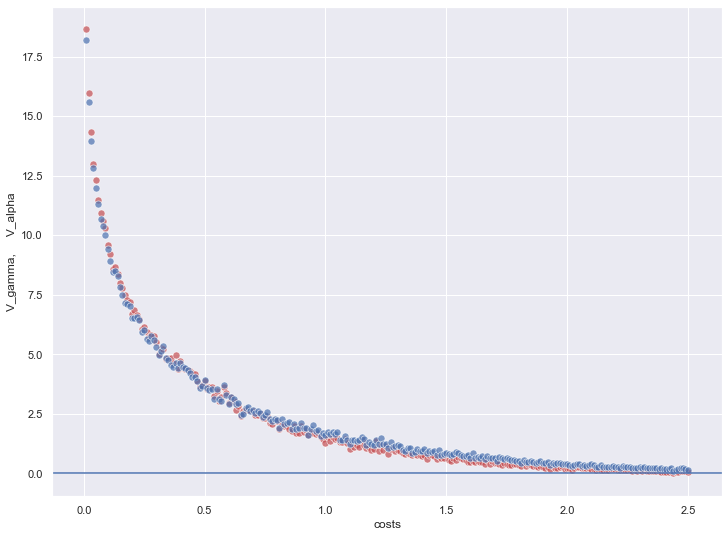

In [101]:
plt.figure(figsize = (12,9))

sns.scatterplot(y='V_gamma', x= 'costs', data=plot_c, color='r', alpha=0.7,s=50 )
sns.scatterplot(y='V_alpha', x= 'costs', data=plot_c, alpha=0.7,s=50,legend='full')

plt.ylabel('V_gamma,     V_alpha')
plt.axhline(0)

In [ ]:
data = {}
results_hist = []
temp = dt_stat.mean()
print(len(temp),len(dt_stat.columns))
plt.scatter(temp,np.arange(0.01,3,step))
plt.show()

In [3]:
data_frame = pd.read_csv(r'C:\Users\Daria_Riazanova\Desktop\NIR\10_players_maxmax_by_p.csv')
data_fram_maxmin = pd.read_csv(r'C:\Users\Daria_Riazanova\Desktop\NIR\10_players_maxmin_by_p.csv')

In [4]:
data_frame.head()

,Unnamed: 0,Value_Func,Number_Iteration,Coalition,Prob,Coalition_as_string
0,0,0.853973,0,[0 0 0 0 0 0 0 0 0 1],0.01,[0 0 0 0 0 0 0 0 0 1]
1,1,0.503973,0,[0 0 0 0 0 0 0 0 1 0],0.01,[0 0 0 0 0 0 0 0 1 0]
2,2,1.357946,0,[0 0 0 0 0 0 0 0 1 1],0.01,[0 0 0 0 0 0 0 0 1 1]
3,3,0.503973,0,[0 0 0 0 0 0 0 1 0 0],0.01,[0 0 0 0 0 0 0 1 0 0]
4,4,1.357946,0,[0 0 0 0 0 0 0 1 0 1],0.01,[0 0 0 0 0 0 0 1 0 1]


In [21]:
n = 10
bounds = (np.zeros(n,),[np.inf for i in range(0,n)])
x0 = np.array(np.zeros(n,))
list_combinations = func_comb(n)
results_10 = []
results_func_10 = []
results_comb10 = []
v_dict = {}
A = func_graph(n, 0.5)
print(A)
for comb in list_combinations:
    res = opt.least_squares(lambda x: equations(x,comb,0.3), [1 for i in range(0,n)], bounds= bounds)
#     print()
    results_10.append(res)
    results_comb10.append(comb)
    results_func_10.append(equations_log(comb,res.x,0.3))
    t = str(comb*[1,2,3,4,5,6,7,8,9,10]).replace('10','y')
    t = t.replace('[', 'V(').replace('0','').replace(']', ')').replace('  ',' ').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ')    
    t = t.replace(' ', ', ').replace('V(, ','V(').replace(', )',')')
    
    print(t)
    if len(t) == 4:
        t = t.replace(')',',)')
    t = t.replace('y','10')
    v_dict.update({t:-func2(comb,res.x,0.3)})
print(v_dict)
with open('file_maxmax10plorg.txt', 'w') as file:
    json.dump(v_dict, file)    
print(t)

[[1 0 0 1 1 0 1 0 0 0]
 [0 1 0 0 0 1 0 1 1 1]
 [0 0 1 0 0 0 1 0 0 1]
 [1 0 0 1 1 1 1 0 0 0]
 [1 0 0 1 1 1 0 1 0 1]
 [0 1 0 1 1 1 0 0 0 1]
 [1 0 1 1 0 0 1 0 1 1]
 [0 1 0 0 1 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 1 0]
 [0 1 1 0 1 1 1 0 0 1]]
V(y)
V(9)
V(9, y)
V(8)
V(8, y)
V(8, 9)
V(8, 9, y)
V(7)
V(7, y)
V(7, 9)
V(7, 9, y)
V(7, 8)
V(7, 8, y)
V(7, 8, 9)
V(7, 8, 9, y)
V(6)
V(6, y)
V(6, 9)
V(6, 9, y)
V(6, 8)
V(6, 8, y)
V(6, 8, 9)
V(6, 8, 9, y)
V(6, 7)
V(6, 7, y)
V(6, 7, 9)
V(6, 7, 9, y)
V(6, 7, 8)
V(6, 7, 8, y)
V(6, 7, 8, 9)
V(6, 7, 8, 9, y)
V(5)
V(5, y)
V(5, 9)
V(5, 9, y)
V(5, 8)
V(5, 8, y)
V(5, 8, 9)
V(5, 8, 9, y)
V(5, 7)
V(5, 7, y)
V(5, 7, 9)
V(5, 7, 9, y)
V(5, 7, 8)
V(5, 7, 8, y)
V(5, 7, 8, 9)
V(5, 7, 8, 9, y)
V(5, 6)
V(5, 6, y)
V(5, 6, 9)
V(5, 6, 9, y)
V(5, 6, 8)
V(5, 6, 8, y)
V(5, 6, 8, 9)
V(5, 6, 8, 9, y)
V(5, 6, 7)
V(5, 6, 7, y)
V(5, 6, 7, 9)
V(5, 6, 7, 9, y)
V(5, 6, 7, 8)
V(5, 6, 7, 8, y)
V(5, 6, 7, 8, 9)
V(5, 6, 7, 8, 9, y)
V(4)
V(4, y)
V(4, 9)
V(4, 9, y)
V(4, 8)
V(4, 8, y)
V(4, 8, 9)
V(4, 

V(1, 7)
V(1, 7, y)
V(1, 7, 9)
V(1, 7, 9, y)
V(1, 7, 8)
V(1, 7, 8, y)
V(1, 7, 8, 9)
V(1, 7, 8, 9, y)
V(1, 6)
V(1, 6, y)
V(1, 6, 9)
V(1, 6, 9, y)
V(1, 6, 8)
V(1, 6, 8, y)
V(1, 6, 8, 9)
V(1, 6, 8, 9, y)
V(1, 6, 7)
V(1, 6, 7, y)
V(1, 6, 7, 9)
V(1, 6, 7, 9, y)
V(1, 6, 7, 8)
V(1, 6, 7, 8, y)
V(1, 6, 7, 8, 9)
V(1, 6, 7, 8, 9, y)
V(1, 5)
V(1, 5, y)
V(1, 5, 9)
V(1, 5, 9, y)
V(1, 5, 8)
V(1, 5, 8, y)
V(1, 5, 8, 9)
V(1, 5, 8, 9, y)
V(1, 5, 7)
V(1, 5, 7, y)
V(1, 5, 7, 9)
V(1, 5, 7, 9, y)
V(1, 5, 7, 8)
V(1, 5, 7, 8, y)
V(1, 5, 7, 8, 9)
V(1, 5, 7, 8, 9, y)
V(1, 5, 6)
V(1, 5, 6, y)
V(1, 5, 6, 9)
V(1, 5, 6, 9, y)
V(1, 5, 6, 8)
V(1, 5, 6, 8, y)
V(1, 5, 6, 8, 9)
V(1, 5, 6, 8, 9, y)
V(1, 5, 6, 7)
V(1, 5, 6, 7, y)
V(1, 5, 6, 7, 9)
V(1, 5, 6, 7, 9, y)
V(1, 5, 6, 7, 8)
V(1, 5, 6, 7, 8, y)
V(1, 5, 6, 7, 8, 9)
V(1, 5, 6, 7, 8, 9, y)
V(1, 4)
V(1, 4, y)
V(1, 4, 9)
V(1, 4, 9, y)
V(1, 4, 8)
V(1, 4, 8, y)
V(1, 4, 8, 9)
V(1, 4, 8, 9, y)
V(1, 4, 7)
V(1, 4, 7, y)
V(1, 4, 7, 9)
V(1, 4, 7, 9, y)
V(1, 4, 7, 8)
V(1, 4, 7,

V(1, 2, 3, 4, 6)
V(1, 2, 3, 4, 6, y)
V(1, 2, 3, 4, 6, 9)
V(1, 2, 3, 4, 6, 9, y)
V(1, 2, 3, 4, 6, 8)
V(1, 2, 3, 4, 6, 8, y)
V(1, 2, 3, 4, 6, 8, 9)
V(1, 2, 3, 4, 6, 8, 9, y)
V(1, 2, 3, 4, 6, 7)
V(1, 2, 3, 4, 6, 7, y)
V(1, 2, 3, 4, 6, 7, 9)
V(1, 2, 3, 4, 6, 7, 9, y)
V(1, 2, 3, 4, 6, 7, 8)
V(1, 2, 3, 4, 6, 7, 8, y)
V(1, 2, 3, 4, 6, 7, 8, 9)
V(1, 2, 3, 4, 6, 7, 8, 9, y)
V(1, 2, 3, 4, 5)
V(1, 2, 3, 4, 5, y)
V(1, 2, 3, 4, 5, 9)
V(1, 2, 3, 4, 5, 9, y)
V(1, 2, 3, 4, 5, 8)
V(1, 2, 3, 4, 5, 8, y)
V(1, 2, 3, 4, 5, 8, 9)
V(1, 2, 3, 4, 5, 8, 9, y)
V(1, 2, 3, 4, 5, 7)
V(1, 2, 3, 4, 5, 7, y)
V(1, 2, 3, 4, 5, 7, 9)
V(1, 2, 3, 4, 5, 7, 9, y)
V(1, 2, 3, 4, 5, 7, 8)
V(1, 2, 3, 4, 5, 7, 8, y)
V(1, 2, 3, 4, 5, 7, 8, 9)
V(1, 2, 3, 4, 5, 7, 8, 9, y)
V(1, 2, 3, 4, 5, 6)
V(1, 2, 3, 4, 5, 6, y)
V(1, 2, 3, 4, 5, 6, 9)
V(1, 2, 3, 4, 5, 6, 9, y)
V(1, 2, 3, 4, 5, 6, 8)
V(1, 2, 3, 4, 5, 6, 8, y)
V(1, 2, 3, 4, 5, 6, 8, 9)
V(1, 2, 3, 4, 5, 6, 8, 9, y)
V(1, 2, 3, 4, 5, 6, 7)
V(1, 2, 3, 4, 5, 6, 7, y)
V(1, 2, 3, 4, 5, 6,

In [103]:
my_data = data_frame.query('Prob == 0.51')
my_data_maxmin = data_fram_maxmin.query('Prob == 0.51')
my_data['Coalition'] = my_data['Coalition'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '),dtype='int', sep=' '))
my_data_maxmin['Coalition'] = my_data_maxmin['Coalition'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '),dtype='int', sep=' '))

C:\Users\Daria_Riazanova\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Daria_Riazanova\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [106]:
popga =data_frame.groupby('Prob', as_index=False).agg({'Value_Func':'mean'})
popa = data_fram_maxmin.groupby('Prob', as_index=False).agg({'Value_Func':'mean'})
popa.head()


,Prob,Value_Func
0,0.01,2.617140
1,0.06,3.295756
2,0.11,4.018419
3,0.16,4.556912
4,0.21,5.335724


Text(0, 0.5, 'V_gamma,     V_alpha')

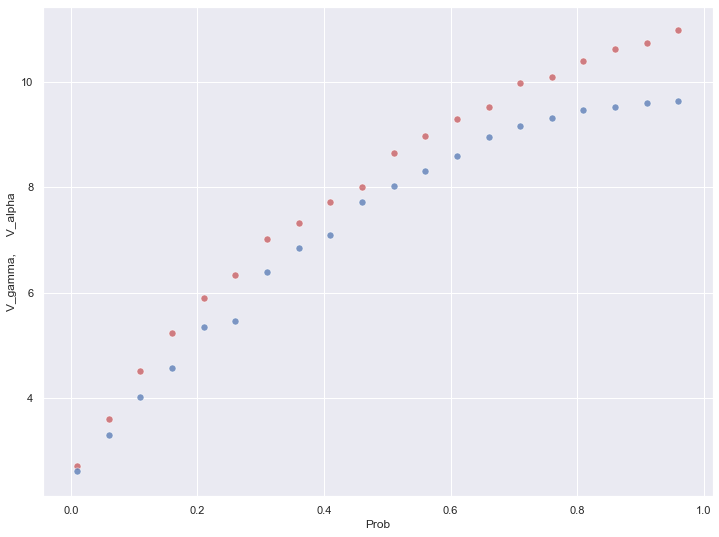

In [109]:
plt.figure(figsize = (12,9))

sns.scatterplot(y='Value_Func', x= 'Prob', data=popga, color='r', alpha=0.7,s=50 )
sns.scatterplot(y='Value_Func', x= 'Prob', data=popa, alpha=0.7,s=50)

plt.ylabel('V_gamma,     V_alpha')

In [118]:
my_data['number_of_players'] = my_data['Coalition'].apply(lambda x:sum(x))
my_data_maxmin['number_of_players'] = my_data_maxmin['Coalition'].apply(lambda x:sum(x))
std_gamma = my_data.groupby('number_of_players', as_index=False).agg({'Value_Func':'std'})
std_alpha = my_data_maxmin.groupby('number_of_players',as_index=False).agg({'Value_Func':'std'})
std_alpha

C:\Users\Daria_Riazanova\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Daria_Riazanova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,number_of_players,Value_Func
0,1,0.000000
1,2,0.543134
2,3,0.990216
3,4,1.175119
4,5,1.252940
5,6,1.304303
6,7,1.331209
7,8,1.365793
8,9,1.389818
9,10,1.472986


Text(0, 0.5, 'Std(V_gamma),     Std(V_alpha)')

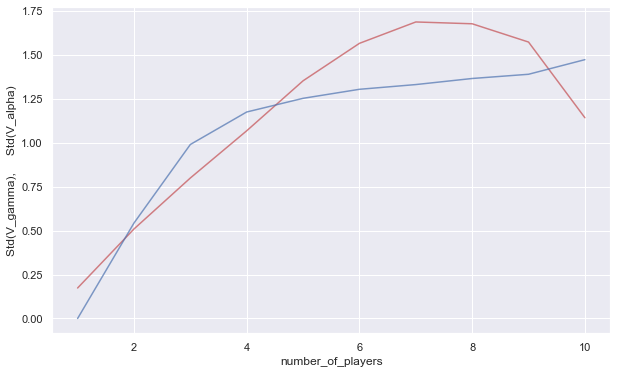

In [129]:
plt.figure(figsize = (10,6))

sns.lineplot(y='Value_Func', x= 'number_of_players', data=std_gamma, color='r', alpha=0.7 )
sns.lineplot(y='Value_Func', x= 'number_of_players', data=std_alpha, alpha=0.7)

plt.ylabel('Std(V_gamma),     Std(V_alpha)')

Text(0, 0.5, 'Shapley value,     Tau_value')

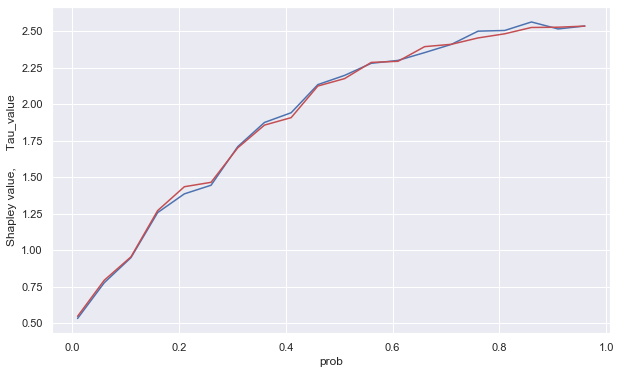

In [37]:
shapley_maxmax = pd.read_csv(r'C:\Users\Daria_Riazanova\Desktop\NIR\shapley_maxmax_p.csv')
shapley_maxmin = pd.read_csv(r'C:\Users\Daria_Riazanova\Desktop\NIR\shapley_maxmin_p.csv')
tau_maxmax = pd.read_csv(r'C:\Users\Daria_Riazanova\Desktop\NIR\tau_maxmax_p.csv')
tau_maxmin = pd.read_csv(r'C:\Users\Daria_Riazanova\Desktop\NIR\tau_maxmin_p.csv')
plt.figure(figsize = (10,6))

# sns.lineplot(y='7', x= 'prob', data=shapley_maxmax, color='r')
# sns.lineplot(y='7', x= 'prob', data=tau_maxmax)
sns.lineplot(y='7', x= 'prob', data=tau_maxmin)
sns.lineplot(y='7', x= 'prob', data=shapley_maxmin, color='r')
plt.ylabel('Shapley value,     Tau_value')

[[1 1 1 1 1]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [1 0 0 1 0]
 [1 0 0 0 1]] = A


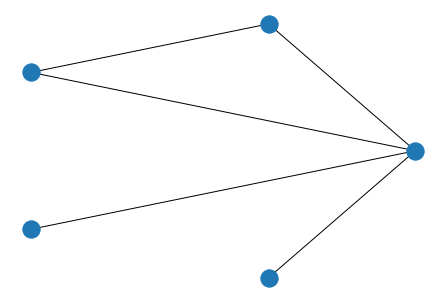

V(5)
V(4)
V(4, 5)
V(3)
V(3, 5)
V(3, 4)
V(3, 4, 5)
V(2)
V(2, 5)
V(2, 4)
V(2, 4, 5)
V(2, 3)
V(2, 3, 5)
V(2, 3, 4)
V(2, 3, 4, 5)
V(1)
V(1, 5)
V(1, 4)
V(1, 4, 5)
V(1, 3)
V(1, 3, 5)
V(1, 3, 4)
V(1, 3, 4, 5)
V(1, 2)
V(1, 2, 5)
V(1, 2, 4)
V(1, 2, 4, 5)
V(1, 2, 3)
V(1, 2, 3, 5)
V(1, 2, 3, 4)
V(1, 2, 3, 4, 5)
{'V(5,)': 3.6151701849020244, 'V(4,)': 3.6151701849020244, 'V(4, 5)': 7.230340369351271, 'V(3,)': 3.6151701849020244, 'V(3, 5)': 7.230340369351271, 'V(3, 4)': 7.230340369351271, 'V(3, 4, 5)': 10.845510557584532, 'V(2,)': 3.6151701849020244, 'V(2, 5)': 7.230340369351271, 'V(2, 4)': 7.230340369351271, 'V(2, 4, 5)': 10.845510557584532, 'V(2, 3)': 8.606634730512166, 'V(2, 3, 5)': 12.221804918048544, 'V(2, 3, 4)': 12.221804918048544, 'V(2, 3, 4, 5)': 15.8369751035323, 'V(1,)': 3.6151701849020244, 'V(1, 5)': 8.606634730512166, 'V(1, 4)': 8.606634730512166, 'V(1, 4, 5)': 14.121347421030581, 'V(1, 3)': 8.606634730512166, 'V(1, 3, 5)': 14.121347421030581, 'V(1, 3, 4)': 14.121347421030581, 'V(1, 3, 

In [9]:
n = 5
x0 = np.array(np.zeros(n,))
tmp = []
v_dict = {}
# comb = np.array([1,1,1,1,1])
list_combinations = func_comb(n)
results,list_res = [], []
step = 0.001
quantity = 10
bounds = Bounds(np.zeros(n,),[np.inf for i in range(0,n)])
x_final,final = [], []
A = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 0, 0],[1, 1, 1, 0, 0],[1, 0, 0, 1, 0],[1, 0, 0, 0, 1]])
print(A, '= A')
graph = [(1, 2),(1, 3),(1, 4), (1, 5), (2,3)]
draw_graph(graph)
for comb in list_combinations:
    res = opt.minimize(lambda x: func2(comb,x), x0, method='TNC', bounds = bounds)
    x_final.append(-func2(comb,res.x))
#     print(comb, -func2(comb,res.x))
    t = str(comb*[1,2,3,4,5]).replace('[', 'V(').replace('0','').replace(']', ')').replace('  ',' ').replace(' ', ',')
    
    t = t.replace(',,', ',').replace(',',', ' ).replace('V(, ','V(').replace(', )',')')
    print(t)
    if len(t) == 4:
        t = t.replace(')',',)')
    v_dict.update({t:-func2(comb,res.x)})
print(v_dict)
with open('file.txt', 'w') as file:
    json.dump(v_dict, file)
#      file.write(json.dumps(v_dict))    